# **Import Libraries**

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import drive

# **Data Loading**

In [44]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [45]:
customers = pd.read_csv('/content/drive/MyDrive/Customers.csv')
products = pd.read_csv('/content/drive/MyDrive/Products.csv')
transactions = pd.read_csv('/content/drive/MyDrive/Transactions.csv')


# **Exploratory Data Analysis (EDA)**

**1. Number of Customers by Region**

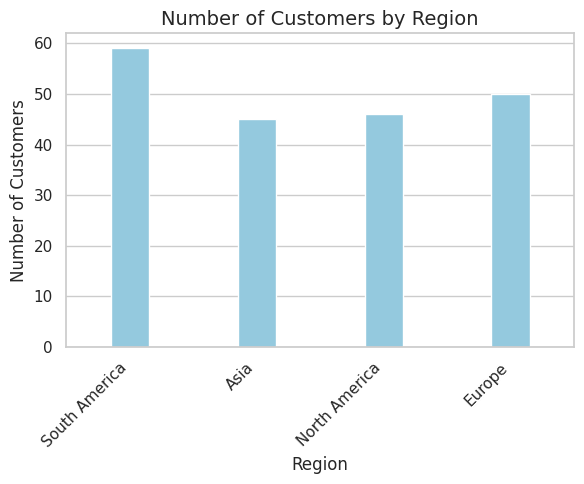

In [46]:

# Plot the number of customers by region using Seaborn
plt.figure(figsize=(6, 5))
sns.countplot(x='Region', data=customers, color='skyblue', width=0.3)

plt.title('Number of Customers by Region', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


**2. Revenue Generated by Region**

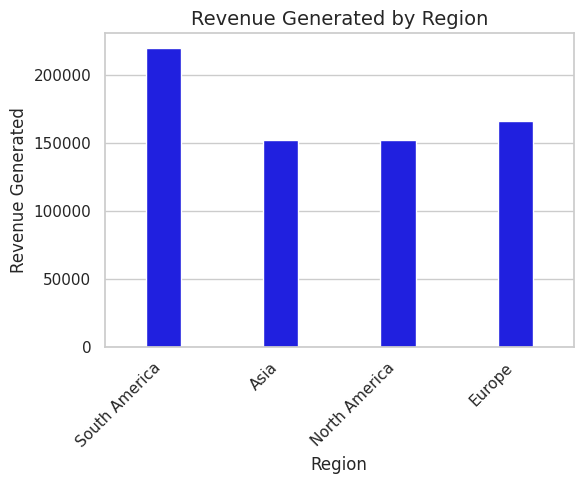

In [63]:
# Merging transactions with customers to get the Region column
transactions_customers = transactions.merge(customers[['CustomerID', 'Region']], on='CustomerID', how='left')

# Calculating the total revenue (sales) by region by summing 'TotalValue' from transactions
total_sales_by_region = transactions_customers.groupby('Region')['TotalValue'].sum().reset_index()

# Renaming the columns
total_sales_by_region.columns = ['Region', 'RevenueGenerated']

# Define the desired order of regions
region_order = ['South America', 'Asia', 'North America', 'Europe']

# Plot the total revenue (sales) per region
plt.figure(figsize=(6, 5))
sns.barplot(x='Region', y='RevenueGenerated', data=total_sales_by_region, color='blue', width=0.3,
            order=region_order)

plt.xlabel('Region', fontsize=12)
plt.ylabel('Revenue Generated', fontsize=12)
plt.title('Revenue Generated by Region', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


In [ ]:
total_revenue = transactions['TotalValue'].sum()
print(f"Total Revenue: ${total_revenue}")

Total Revenue: $689995.56


**3. Number of Customer Signups by Month**

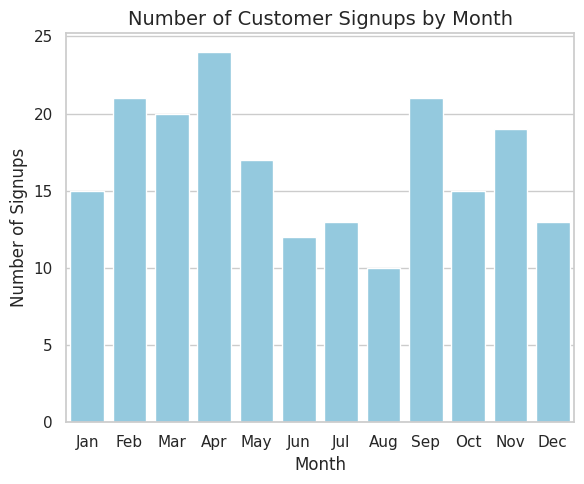

In [66]:
# Converting 'SignupDate' to datetime and extract the month
customers['SignupDate'] = pd.to_datetime(customers['SignupDate'])
customers['SignupMonth'] = customers['SignupDate'].dt.month

# Counting the number of signups per month
signup_counts = customers['SignupMonth'].value_counts().sort_index()

plt.figure(figsize=(6, 5))
sns.barplot(x=signup_counts.index, y=signup_counts.values, color='skyblue')

plt.title('Number of Customer Signups by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Signups', fontsize=12)

plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

plt.tight_layout()
plt.show()


**4. Most Popular Product Categories**

Sales by Category:
Category
Home Decor     150893.93
Clothing       166170.66
Electronics    180783.50
Books          192147.47


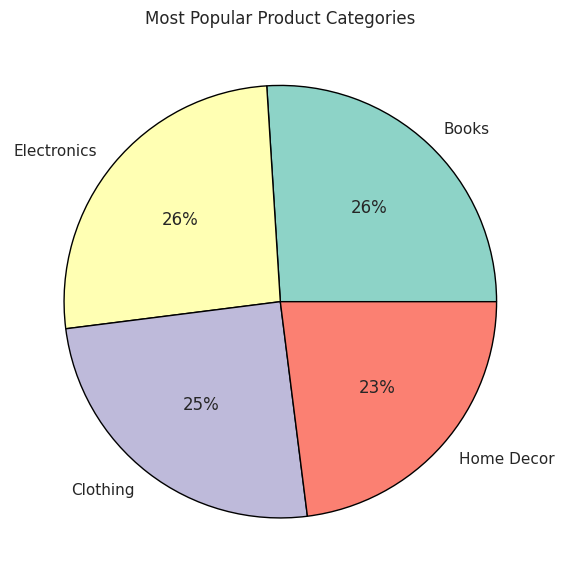

In [49]:
# Counting the frequency of each category
category_counts = products['Category'].value_counts()

plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
category_counts.plot(kind='pie', title='Most Popular Product Categories', autopct='%1.0f%%', colors=sns.color_palette('Set3', len(category_counts)), wedgeprops={'edgecolor': 'black'})

category_sales = transactions.merge(products, on='ProductID').groupby('Category')['TotalValue'].sum().sort_values()

print("Sales by Category:")
print(category_sales.to_string())

plt.ylabel('')

plt.tight_layout()
plt.show()


**5. Products above and below the average Price by Category**

<Figure size 800x600 with 0 Axes>

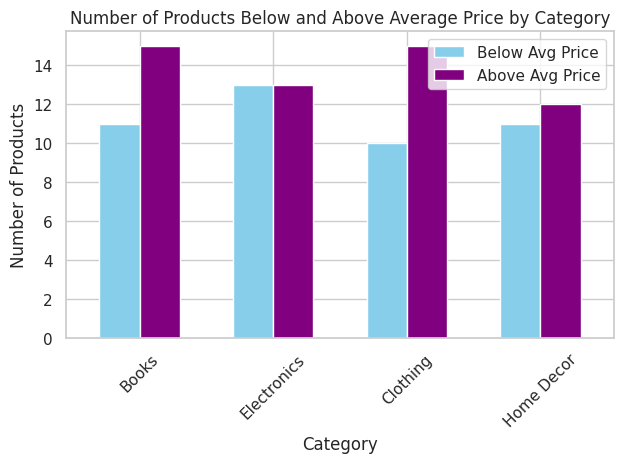

In [64]:
# Calculating the average product price by category
price_distribution = products.groupby('Category')['Price'].mean().sort_values(ascending=False)

# Creating columns for products below and above average price
below_avg_count = []
above_avg_count = []

for category in price_distribution.index:
    # Filtering products by category
    category_products = products[products['Category'] == category]

    # Counting products below and above average price
    avg_price = price_distribution[category]
    below_avg_count.append((category_products['Price'] < avg_price).sum())
    above_avg_count.append((category_products['Price'] >= avg_price).sum())

# Creating a DataFrame for the counts
category_counts = pd.DataFrame({
    'Category': price_distribution.index,
    'Below Avg Price': below_avg_count,
    'Above Avg Price': above_avg_count
})

# Plotting
plt.figure(figsize=(8, 6))
category_counts.set_index('Category').plot(kind='bar', stacked=False, color=['skyblue', 'purple'], width=0.6)

plt.title('Number of Products Below and Above Average Price by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


**6. Total Sales by Month**

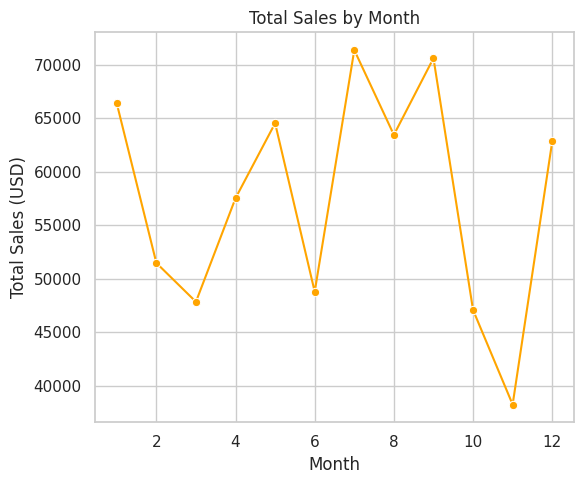

In [65]:

# Converting 'TransactionDate' to datetime
transactions['TransactionDate'] = pd.to_datetime(transactions['TransactionDate'])

# Extracting the month from 'TransactionDate'
transactions['Month'] = transactions['TransactionDate'].dt.month

# Group by 'Month' and calculate total sales
monthly_sales = transactions.groupby('Month')['TotalValue'].sum().reset_index()

plt.figure(figsize=(6, 5))
sns.lineplot(data=monthly_sales, x='Month', y='TotalValue', marker='o', color='orange')

plt.title('Total Sales by Month')
plt.xlabel('Month')
plt.ylabel('Total Sales (USD)')

plt.tight_layout()
plt.show()


**7. Top 5 Products by Revenue**

Top 5 Products by Revenue:
       ProductName  TotalValue
TechPro Headphones    19513.80
    ActiveWear Rug    17946.91
  TechPro Cookbook    17905.20
 ActiveWear Jacket    15060.92
   HomeSense Novel    14592.24


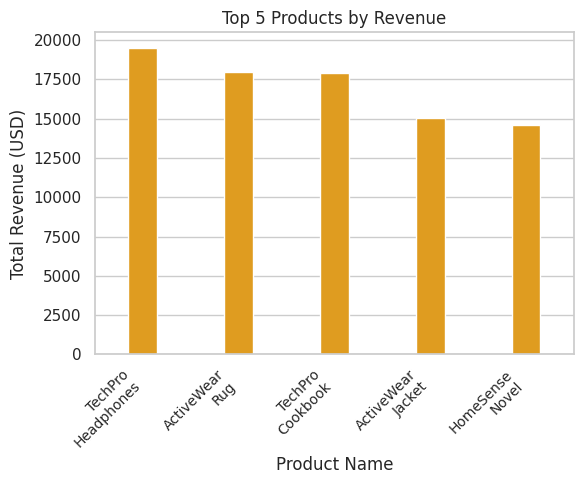

In [59]:
# Assuming 'products' DataFrame contains 'ProductID' and 'ProductName'
top_products = transactions.groupby('ProductID')['TotalValue'].sum().sort_values(ascending=False)

# Join with 'products' DataFrame to get product names
top_products_with_names = top_products.reset_index().merge(products[['ProductID', 'ProductName']], on='ProductID', how='left')

# Selecting the top 5 products
top_5_products = top_products_with_names.head(5)

print("Top 5 Products by Revenue:")
print(top_5_products[['ProductName', 'TotalValue']].to_string(index=False))

# Plotting the top 5 products by revenue
plt.figure(figsize=(6, 5))
sns.barplot(x=top_5_products['ProductName'], y=top_5_products['TotalValue'], color='orange', width=0.3)

plt.title('Top 5 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue (USD)')

# Adjust font size and split long labels into two lines
plt.xticks(ticks=range(len(top_5_products)),
           rotation=45,
           ha='right',
           fontsize=10,
           labels=[label.replace(' ', '\n', 1) for label in top_5_products['ProductName']])

plt.tight_layout()
plt.show()


**8. Least 5 Products by Revenue**

Bottom 5 Products by Revenue:
             ProductName  TotalValue
       HomeSense T-Shirt      730.35
    ComfortLiving Laptop      647.76
       ActiveWear Jacket      367.64
    SoundWave Smartwatch      337.68
ActiveWear Running Shoes      244.66


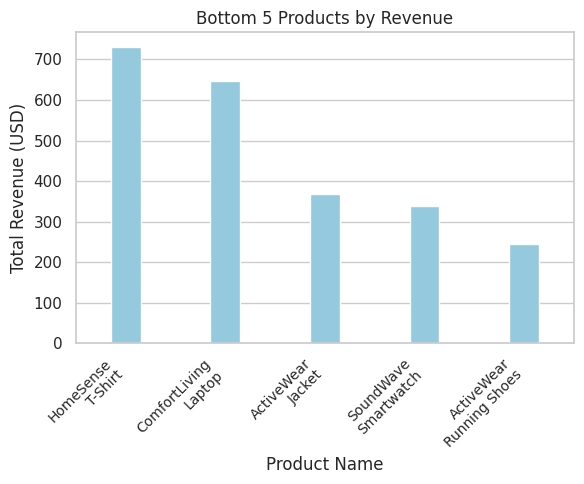

In [67]:
# Selecting the bottom 5 products by revenue
bottom_5_products = top_products_with_names.tail(5)

print("Bottom 5 Products by Revenue:")
print(bottom_5_products[['ProductName', 'TotalValue']].to_string(index=False))

# Plotting the bottom 5 products by revenue
plt.figure(figsize=(6, 5))
sns.barplot(x=bottom_5_products['ProductName'], y=bottom_5_products['TotalValue'], color='skyblue', width=0.3)

plt.title('Bottom 5 Products by Revenue')
plt.xlabel('Product Name')
plt.ylabel('Total Revenue (USD)')

# Adjust font size and split long labels into two lines
plt.xticks(ticks=range(len(bottom_5_products)),
           rotation=45,
           ha='right',
           fontsize=10,
           labels=[label.replace(' ', '\n', 1) for label in bottom_5_products['ProductName']])

plt.tight_layout()
plt.show()
